In [1]:
import pandas as pd
import datetime as dt
import dateutil.parser
import calendar

In [2]:
!ls

Citibike_clean.ipynb Instructions
Data                 Tableau_Homework.twb


In [3]:
# Import csv from Citibike data
bike202006 = pd.read_csv('Data/202006-citibike-tripdata 2.csv')
bike202007 = pd.read_csv('Data/202007-citibike-tripdata.csv')
bike202008 = pd.read_csv('Data/202008-citibike-tripdata.csv')
bike202009 = pd.read_csv('Data/202009-citibike-tripdata.csv')
bike202010 = pd.read_csv('Data/202010-citibike-tripdata.csv')
bike202011 = pd.read_csv('Data/202011-citibike-tripdata.csv')
bike202012 = pd.read_csv('Data/202012-citibike-tripdata.csv')

In [4]:
# Combine multiple months
df_citibike = bike202006.append([bike202007,bike202008,bike202009,bike202010,bike202011,bike202012], ignore_index = True)

In [5]:
df_citibike.to_csv('Data/tripdata.csv', index = False)

In [6]:
df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880322 entries, 0 to 13880321
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 1.6+ GB


In [7]:
number_of_trips_unclean = len(df_citibike['usertype'])

In [8]:
number_of_trips_unclean

13880322

In [9]:
#Add date to use in Tableau
df_citibike["date"] = df_citibike["starttime"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') if pd.notnull(x) else np.nan).map(lambda x: x.strftime('%m/%d/%Y') if pd.notnull(x) else np.nan)
df_citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,06/01/2020
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,06/01/2020
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,06/01/2020
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,06/01/2020
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,06/01/2020


In [10]:
# Add gender to gender numbers
gender_dict = {0:"Unknown",1:"Male",2:"Female"}
df_citibike["gender_text"] = df_citibike["gender"].map(gender_dict)
df_citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,gender_text
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,06/01/2020,Female
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,06/01/2020,Unknown
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,06/01/2020,Female
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,06/01/2020,Unknown
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,06/01/2020,Female


In [11]:
df_citibike.to_csv('Data/tripdata.csv', index = False)

In [12]:
df_citibike = pd.read_csv('Data/tripdata.csv')
# Add column for weekdays
df_citibike["Weekday"] = df_citibike["starttime"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') if pd.notnull(x) else np.nan)\
                                .map(lambda x: calendar.day_name[x.weekday()]  if pd.notnull(x) else np.nan)
df_citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,gender_text,Weekday
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,06/01/2020,Female,Monday
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,06/01/2020,Unknown,Monday
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,06/01/2020,Female,Monday
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,06/01/2020,Unknown,Monday
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,06/01/2020,Female,Monday


In [13]:
# Calculate Number of Rides - Weekend vs Weekday
weekend_days = df_citibike.loc[df_citibike['Weekday'].isin(['Saturday','Sunday'])]['date'].nunique()
weekdays = df_citibike.loc[~df_citibike['Weekday'].isin(['Saturday','Sunday'])]['date'].nunique()

weekend_rides = df_citibike.loc[df_citibike['Weekday'].isin(['Saturday','Sunday'])]['Weekday'].count()
weekday_rides = df_citibike.loc[~df_citibike['Weekday'].isin(['Saturday','Sunday'])]['Weekday'].count()

In [18]:
df_citibike

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,gender_text,Weekday
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,06/01/2020,Female,Monday
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,06/01/2020,Unknown,Monday
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,06/01/2020,Female,Monday
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,06/01/2020,Unknown,Monday
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,06/01/2020,Female,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13880317,2045,2020-12-31 23:58:21.7040,2021-01-01 00:32:27.1570,526,E 33 St & 5 Ave,40.747659,-73.984907,3614,Crescent St & 30 Ave,40.768692,-73.924957,36467,Subscriber,1994,1,12/31/2020,Male,Thursday
13880318,288,2020-12-31 23:58:37.8400,2021-01-01 00:03:26.3250,3307,West End Ave & W 94 St,40.794165,-73.974124,3383,Cathedral Pkwy & Broadway,40.804213,-73.966991,47749,Subscriber,1969,0,12/31/2020,Unknown,Thursday
13880319,152,2020-12-31 23:58:52.8090,2021-01-01 00:01:25.6720,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,3518,Lenox Ave & W 126 St,40.808442,-73.945209,48691,Customer,1969,0,12/31/2020,Unknown,Thursday
13880320,654,2020-12-31 23:59:55.9550,2021-01-01 00:10:50.6050,4073,W 51 St & Rockefeller Plaza,40.759700,-73.978082,500,Broadway & W 51 St,40.762288,-73.983362,49564,Subscriber,1994,1,12/31/2020,Male,Thursday


In [14]:
# Calculate the average
weekday_daily_average = round(weekday_rides/weekdays,0)
weekend_daily_average = round(weekend_rides/weekend_days,0)

approximate_daily_business = weekday_daily_average - weekend_daily_average

ride_summary = pd.DataFrame({"Avg Daily Sat-Sun":int(weekend_daily_average),\
                         "Avg Weekday":int(weekday_daily_average),\
                         "Approx. Daily Business Rides":int(approximate_daily_business)},index=[""])
ride_summary

,Avg Daily Sat-Sun,Avg Weekday,Approx. Daily Business Rides
,70915,62503,-8412


<AxesSubplot:>

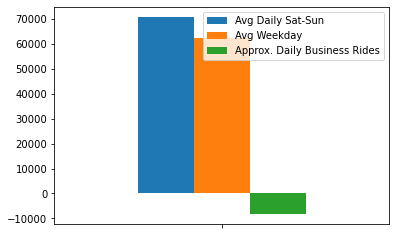

In [15]:
ride_summary.plot.bar()

In [16]:
df_citibike.to_csv('Data/tripdata.csv', index = False)